In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import os 

# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

In [2]:
# HELPER METHODS 
def load_file(path, file, file_type):
    where  = path + "/" + file
    if( file_type == 'tsv'):
        return pd.read_csv( where,sep = '\t')
    elif( file_type == 'txt'):
        pass
    else:
        raise Exception(f"unsupported file type: {file_type}")

In [3]:
# LOAD FILES
directory = 'MovieSummaries'
files = os.listdir(directory)
print(files)
file_types = [ file.split('.')[-1] for file in files ]

load_file( directory, files[0], file_types[0]).shape

['movie.metadata.tsv', 'character.metadata.tsv', 'name.clusters.txt', 'tvtropes.clusters.txt', 'plot_summaries.txt', 'README.txt']


(81740, 9)

In [4]:
where = directory + '/' + 'plot_summaries.txt'
with open(where ) as f:
    contents = f.readlines()
    
code2movie = {}
plots = []
for movie in contents:
    code, plot = movie.split('\t')
    code2movie[code] = plot
    plots.append( plot)

    
len(contents)
plots = np.array(plots)


In [5]:
code2movie.keys()

dict_keys(['23890098', '31186339', '20663735', '2231378', '595909', '5272176', '1952976', '24225279', '2462689', '20532852', '15401493', '18188932', '2940516', '1335380', '1480747', '24448645', '15072401', '4018288', '4596602', '15224586', '15585766', '1760737', '29062594', '29326153', '9252321', '8388648', '10644072', '13455076', '33269085', '2254491', '447194', '24165951', '18549958', '12978934', '8471210', '1925869', '10799612', '3150865', '20591333', '28238240', '5414895', '17124781', '5425205', '28207941', '14330027', '4356664', '19174305', '33417831', '2408359', '1838882', '25755313', '10016997', '8153846', '24486071', '4466226', '27975390', '6167400', '17711304', '18392317', '15161056', '21500407', '3459677', '34420857', '18369853', '529276', '20631892', '24577134', '32556450', '455089', '23266463', '35779717', '23299845', '226664', '25113407', '27403920', '2524925', '657446', '1591973', '12383757', '4355919', '32163620', '11685571', '4039635', '17371197', '1282593', '7504323', 

In [6]:
# plot_words = np.array( [ plot.split() for plot in plots])

plot_sizes = []
for plot in plots:
    plot_sizes.append( len(plot.split()))
plot_sizes = np.array(plot_sizes)

In [7]:
len(plot_sizes)

42306

In [8]:
np.median(plot_sizes)

187.0

In [9]:
plot_sizes.sum()

13145251

In [10]:
movie_columns = ['Wikipedia_ID','Freebase_ID','name','release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres' ]

movies_df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t',  header=None,names=movie_columns,skiprows=1)

In [11]:
movies_df.countries.value_counts().head(30)

{"/m/09c7w0": "United States of America"}                                  30299
{"/m/03rk0": "India"}                                                       8240
{}                                                                          8154
{"/m/07ssc": "United Kingdom"}                                              5343
{"/m/03_3d": "Japan"}                                                       2242
{"/m/0f8l9c": "France"}                                                     1853
{"/m/03rjj": "Italy"}                                                       1730
{"/m/0d060g": "Canada"}                                                     1342
{"/m/0jgd": "Argentina"}                                                    1266
{"/m/03h64": "Hong Kong"}                                                    850
{"/m/09c7w0": "United States of America", "/m/07ssc": "United Kingdom"}      845
{"/m/06qd3": "South Korea"}                                                  788
{"/m/0345h": "Germany"}     

In [13]:
character_columns = ['Wikipedia_ID','Freebase_ID', 'release_date', 'movie_name',
                     'date_of_birth', 'gender' , 'height', 'ethnicity', 'actor_name',
                    'age_at_realease', 'character2actor_map_ID', 'character_ID', 'actor_ID']

actors_df = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t',  header=None,names=character_columns,skiprows=1)

In [14]:
actors_df.gender.value_counts()

M    270257
F    134802
Name: gender, dtype: int64

In [15]:
res = actors_df.groupby('gender').actor_ID.unique()
res[0].shape[0]

35864

In [16]:
res[1].shape[0]

61519

In [17]:
res[0].shape[0] / res[1].shape[0] 

0.5829743656431347

In [18]:
actors_df.keys()

Index(['Wikipedia_ID', 'Freebase_ID', 'release_date', 'movie_name',
       'date_of_birth', 'gender', 'height', 'ethnicity', 'actor_name',
       'age_at_realease', 'character2actor_map_ID', 'character_ID',
       'actor_ID'],
      dtype='object')

In [19]:
actors_age_df = actors_df[ ~actors_df['age_at_realease'].isna()]
actors_age_df = actors_age_df[ actors_age_df['age_at_realease'] >= 0]
actors_age_df.age_at_realease.sort_values().value_counts().sort_index()

0.0       52
1.0       39
2.0       69
3.0       87
4.0      130
        ... 
95.0      12
96.0       7
97.0       3
99.0       2
103.0      2
Name: age_at_realease, Length: 100, dtype: int64

/home/matthieu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of appearances')

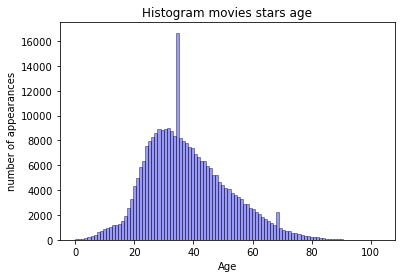

In [20]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
# plt.hist(actors_age_df['age_at_realease'], color = 'blue', edgecolor = 'black',
#          bins = int(180/5))

# seaborn histogram
sns.distplot(actors_age_df['age_at_realease'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram movies stars age')
plt.xlabel('Age')
plt.ylabel('number of appearances')

In [111]:
def quartiles(data):
#     return [np.quantile(data, x/4) for x in range(1, 4)]
    return [ np.quantile(data, 0.1), np.quantile(data, 0.5), np.quantile(data, 0.9)]

Women[24.0, 30.0, 40.0]
Men[31.0, 39.0, 49.0]
Actors[28.0, 36.0, 47.0]


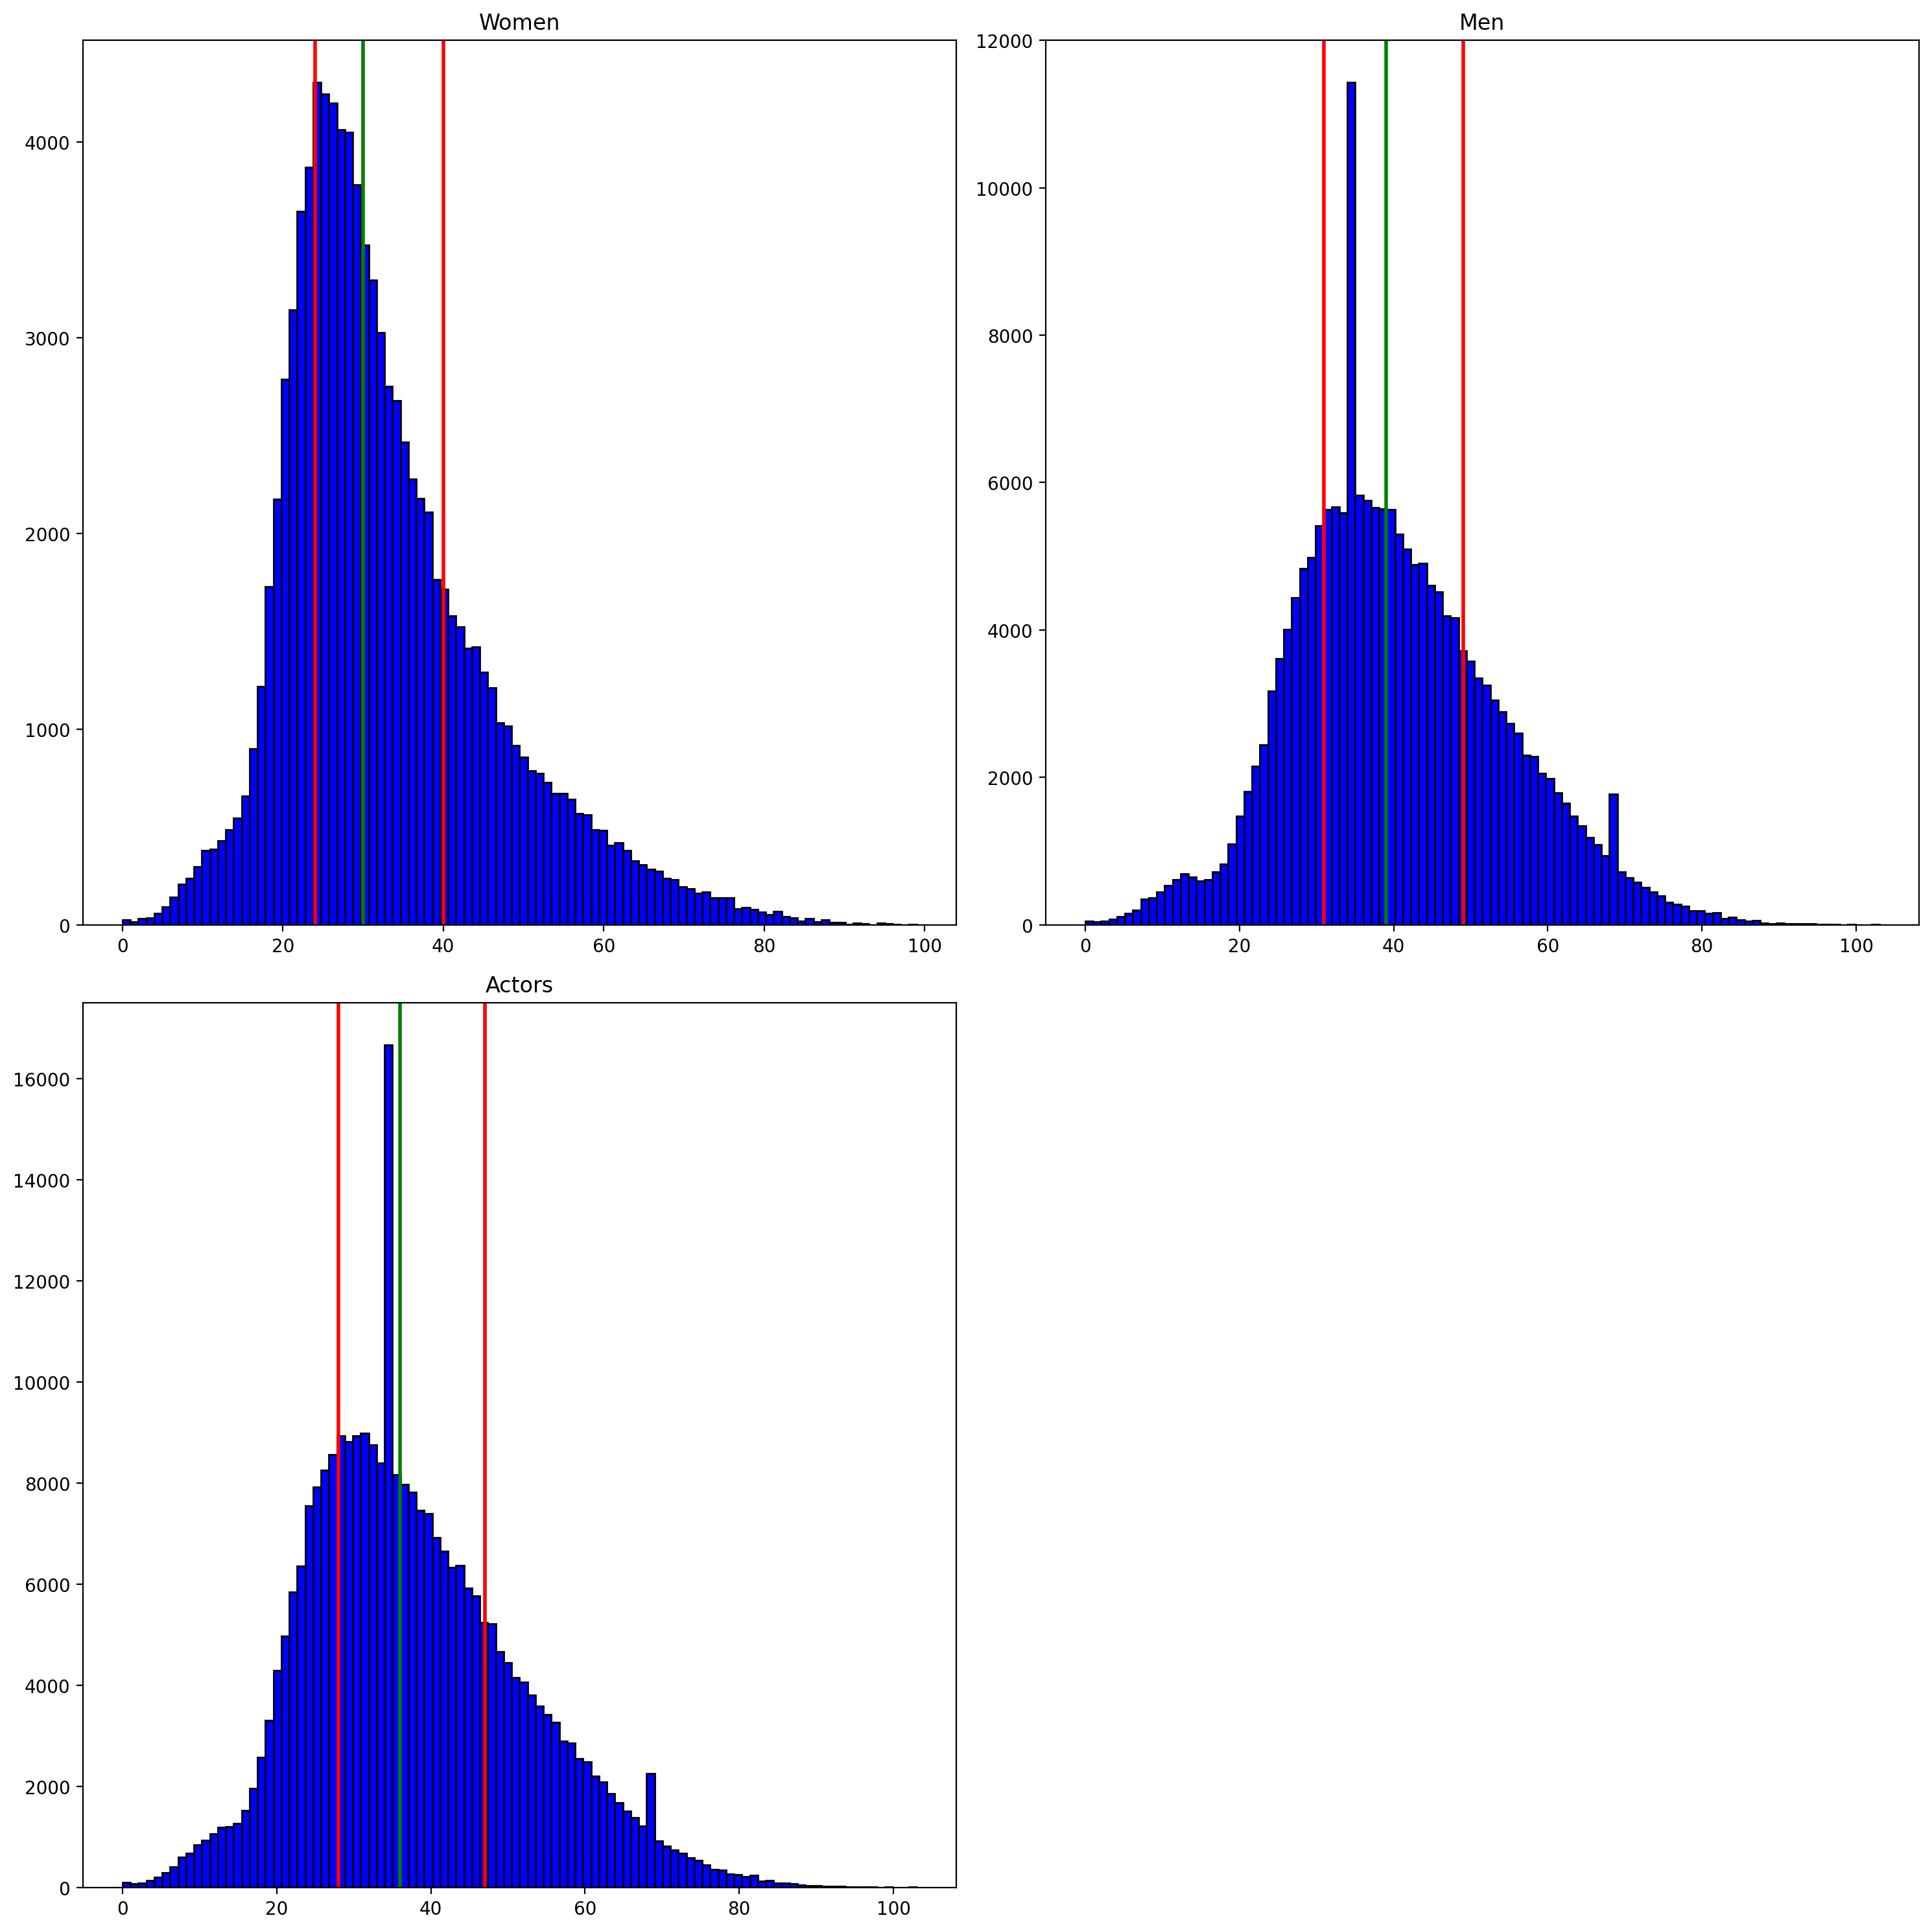

In [22]:

categories = [actors_age_df[actors_age_df['gender'] == "F"]['age_at_realease'],
              actors_age_df[actors_age_df['gender'] == "M"]['age_at_realease'],
              actors_age_df['age_at_realease']]

cat_names = [ "Women", "Men", "Actors"]




figure(figsize=(15, 15), dpi=200)
# Show 4 different binwidths
for i, data in enumerate(categories):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(data, 100, color = 'blue', edgecolor = 'black')
    stats = quartiles(data)
    print(cat_names[i] + str(stats))
    
    ax.axvline(stats[0], color='r', linewidth=2)
    ax.axvline(stats[1], color='g', linewidth=2)
    ax.axvline(stats[2], color='r', linewidth=2)
    
#     # Title and labels
    ax.set_title(cat_names[i])
# #     ax.set_xlabel('Delay (min)', size = 22)
# #     ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [23]:
test to compare distribution
Kolgomorov test maybe 
t-test 

SyntaxError: invalid syntax (3536916822.py, line 1)

In [ ]:
import datetime
years_apparue = actors_age_df.release_date.astype('datetime64[ns]').dt.year

binwidth = 10
start = int(min(years_apparue/10))*10
end  = (int(max(years_apparue/10))+2)*10
plt.hist(years_apparue, bins=range(start, end , binwidth), color = 'blue', edgecolor = 'black')
plt.show()
# actors_age_df.release_date


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
plt.show()

In [ ]:
actors_df['ethnicity'].value_counts()

In [ ]:
actors_df.keys()

In [ ]:
actors_df[ actors_df['actor_name'] == 'Mel Blanc']

In [ ]:
actors_df.groupby(['actor_name', 'gender'])['actor_ID' ].count().sort_values(ascending=False).head(50)#.value_counts()

In [ ]:
year_bins 

In [25]:
from scipy import stats
stats.ttest_ind(categories[0], categories[1])

Ttest_indResult(statistic=-140.9261997664695, pvalue=0.0)

In [30]:
data_bins = [[1900+ 10*x, 1910 + 10*x] for x in range(12)]
data_bins

[[1900, 1910],
 [1910, 1920],
 [1920, 1930],
 [1930, 1940],
 [1940, 1950],
 [1950, 1960],
 [1960, 1970],
 [1970, 1980],
 [1980, 1990],
 [1990, 2000],
 [2000, 2010],
 [2010, 2020]]

[1900, 1910] | 
[1910, 1920] | female:[6.0, 14.0, 17.0]  r: 11 | male:[3.0, 6.0, 16.0]   r: 13 | all:[4.0, 13.0, 17.0]  r: 13 | 
[1920, 1930] | female:[16.0, 21.0, 26.0] r: 10 | male:[6.0, 21.0, 27.0]  r: 21 | all:[8.0, 21.0, 26.0]  r: 18 | 
[1930, 1940] | female:[18.0, 25.0, 31.0] r: 13 | male:[16.0, 30.0, 35.0] r: 19 | all:[18.0, 27.0, 34.0] r: 16 | 
[1940, 1950] | female:[19.0, 27.0, 39.0] r: 20 | male:[24.0, 35.0, 43.0] r: 19 | all:[21.0, 32.0, 42.0] r: 21 | 
[1950, 1960] | female:[20.0, 29.0, 46.0] r: 26 | male:[26.0, 38.0, 50.0] r: 24 | all:[23.0, 35.0, 49.0] r: 26 | 
[1960, 1970] | female:[20.0, 30.0, 49.0] r: 29 | male:[27.0, 40.0, 56.0] r: 29 | all:[23.0, 38.0, 55.0] r: 32 | 
[1970, 1980] | female:[20.0, 31.0, 52.0] r: 32 | male:[26.0, 41.0, 59.0] r: 33 | all:[23.0, 38.0, 58.0] r: 35 | 
[1980, 1990] | female:[19.0, 31.0, 54.0] r: 35 | male:[24.0, 40.0, 61.0] r: 37 | all:[22.0, 37.0, 59.0] r: 37 | 
[1990, 2000] | female:[19.0, 31.0, 54.0] r: 35 | male:[24.0, 40.0, 61.0] r: 37 |

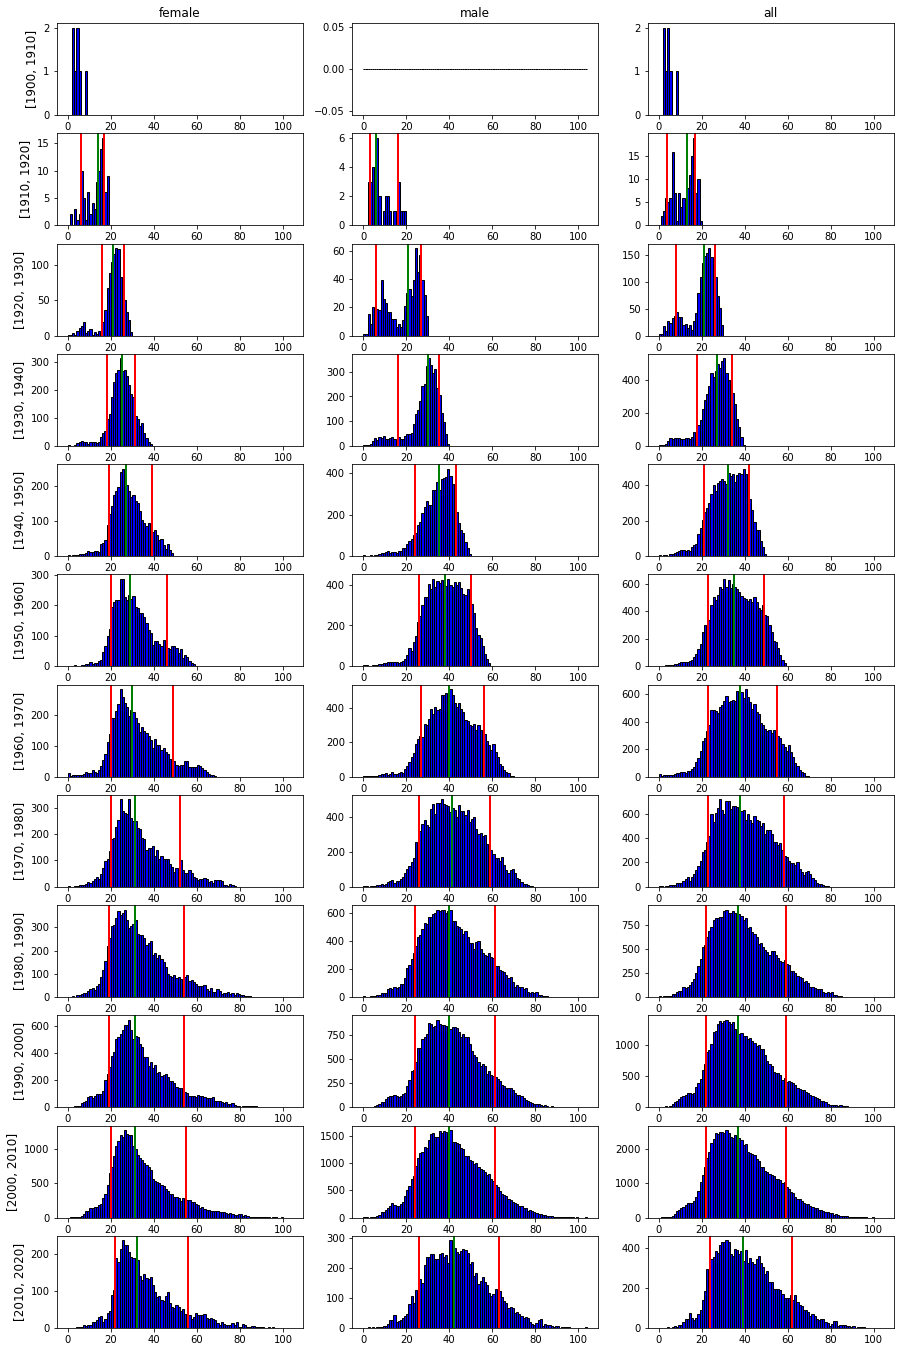

<Figure size 3000x3000 with 0 Axes>

In [112]:

sex_df_dict = {'female': actors_age_df[actors_age_df['gender'] == "F"],
              'male': actors_age_df[actors_age_df['gender'] == "M"],
              'all': actors_age_df}

cat_names = [ "Women", "Men", "Actors"]


fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 24))


figure(figsize=(15, 15), dpi=200)
# Show 4 different binwidths
for row, date_range in enumerate(data_bins):
    print(date_range, end=' | ')
    for column, sex in enumerate(sex_df_dict.keys()):
        

        # Set up the plot
#         ax = plt.subplot(12, 3, row*3 + column + 1)
        
        # Draw the plot
        rel_y = np.array([date.split('-')[0] for date in  sex_df_dict[sex]['release_date']])
        data = sex_df_dict[sex][ (rel_y  > str(date_range[0]) ) & (rel_y  < str(date_range[1]) )]['age_at_realease']
        axes[row,column].hist(data, [x for x in range(105)], color = 'blue', edgecolor = 'black')
        data = data.values
        if( data.shape[0] > 10):
            bstats = quartiles(data)
#             print( f"{sex}:{str(bstats):18} #{data.shape[0]:5} | ", end='' )
            print( f"{sex}:{str(bstats):18} r: {str(int(bstats[2] - bstats[0])):2} | ", end='' )

            axes[row,column].axvline(bstats[0], color='r', linewidth=2)
            axes[row,column].axvline(bstats[1], color='g', linewidth=2)
            axes[row,column].axvline(bstats[2], color='r', linewidth=2)

#     #     # Title and labels
#         ax.set_title(cat_names[i])
    # #     ax.set_xlabel('Delay (min)', size = 22)
    # #     ax.set_ylabel('Flights', size= 22)
    print()
    
for ax, col in zip(axes[0], sex_df_dict.keys()):
    ax.set_title(col)

for ax, row in zip(axes[:,0], data_bins):
    ax.set_ylabel(row, size='large' )
    
# plt.tight_layout()
plt.show()

In [97]:
len('[19.0, 21.0, 24.0]')

18

In [61]:
rel_y = np.array([date.split('-')[0] for date in  sex_df_dict['f']['release_date']])
sex_df_dict['f'][ (rel_y  > str(data_bins[0][0]) ) & (rel_y  < str(data_bins[0][1]) )]['age_at_realease']
#[( sex_df_dict['f']['release_date'])]#.dt.Year < str(data_bins[0][0]))]  #['age_at_realease']

26341     4.0
132702    8.0
192731    3.0
280212    4.0
397150    2.0
397151    5.0
447462    2.0
Name: age_at_realease, dtype: float64

In [128]:
ages = np.zeros((len(data_bins), 3))
for row, date_range in enumerate(data_bins):
    for column, sex in enumerate(sex_df_dict.keys()):
        
        rel_y = np.array([date.split('-')[0] for date in  sex_df_dict[sex]['release_date']])
        data = sex_df_dict[sex][ (rel_y  > str(date_range[0]) ) & (rel_y  < str(date_range[1]) )]['age_at_realease']
        
        ages[row,column] = data.shape[0]

    
for row, date_range in enumerate(data_bins):
    print(date_range, end=' | ')
    for column, sex in enumerate(sex_df_dict.keys()):
        print( f"{sex}:{data.shape[0]:6} ratio: {round(ages[row,column] / ages[row,2],2):4.2f} | ", end='' )
    print()

[1900, 1910] | female: 14677 ratio: 1.00 | male: 14677 ratio: 0.00 | all: 14677 ratio: 1.00 | 
[1910, 1920] | female: 14677 ratio: 0.74 | male: 14677 ratio: 0.26 | all: 14677 ratio: 1.00 | 
[1920, 1930] | female: 14677 ratio: 0.60 | male: 14677 ratio: 0.39 | all: 14677 ratio: 1.00 | 
[1930, 1940] | female: 14677 ratio: 0.47 | male: 14677 ratio: 0.53 | all: 14677 ratio: 1.00 | 
[1940, 1950] | female: 14677 ratio: 0.36 | male: 14677 ratio: 0.64 | all: 14677 ratio: 1.00 | 
[1950, 1960] | female: 14677 ratio: 0.32 | male: 14677 ratio: 0.68 | all: 14677 ratio: 1.00 | 
[1960, 1970] | female: 14677 ratio: 0.29 | male: 14677 ratio: 0.70 | all: 14677 ratio: 1.00 | 
[1970, 1980] | female: 14677 ratio: 0.30 | male: 14677 ratio: 0.69 | all: 14677 ratio: 1.00 | 
[1980, 1990] | female: 14677 ratio: 0.31 | male: 14677 ratio: 0.68 | all: 14677 ratio: 1.00 | 
[1990, 2000] | female: 14677 ratio: 0.33 | male: 14677 ratio: 0.66 | all: 14677 ratio: 1.00 | 
[2000, 2010] | female: 14677 ratio: 0.35 | male: 1